<a href="https://colab.research.google.com/github/MahamadfayazRajekhan/Hypothetical-ghg-emissions-wheat-india/blob/main/Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload("Wheat_farmers_4000.csv")





Saving wheat_farmers_4000.csv to Wheat_farmers_4000.csv/wheat_farmers_4000.csv


In [12]:
from google.colab import files
uploaded = files.upload()


Saving wheat_farmers_4000.csv to wheat_farmers_4000.csv


In [13]:
df = pd.read_csv("wheat_farmers_4000.csv")


In [14]:
import pandas as pd

df = pd.read_csv("wheat_farmers_4000.csv")

# IPCC Tier-1 factors
EF_direct = 0.01
EF_indirect = 0.004
N2O_conversion = 1.57
GWP_N2O = 298  # N2O global warming potential

# Calculations
df["N2O_N_direct"] = df["N_applied_kg_per_ha"] * EF_direct
df["N2O_N_indirect"] = df["N_applied_kg_per_ha"] * EF_indirect
df["Total_N2O_N"] = df["N2O_N_direct"] + df["N2O_N_indirect"]
df["N2O_gas_kg_per_ha"] = df["Total_N2O_N"] * N2O_conversion
df["CO2e_kg_per_ha"] = df["N2O_gas_kg_per_ha"] * GWP_N2O

df.head()


,farmer_id,district,state,crop,N_applied_kg_per_ha,N2O_N_direct,N2O_N_indirect,Total_N2O_N,N2O_gas_kg_per_ha,CO2e_kg_per_ha
0,1,Gadag,Karnataka,Wheat,100,1.0,0.40,1.40,2.1980,655.0040
1,2,Gadag,Karnataka,Wheat,60,0.6,0.24,0.84,1.3188,393.0024
2,3,Gadag,Karnataka,Wheat,110,1.1,0.44,1.54,2.4178,720.5044
3,4,Gadag,Karnataka,Wheat,80,0.8,0.32,1.12,1.7584,524.0032
4,5,Gadag,Karnataka,Wheat,100,1.0,0.40,1.40,2.1980,655.0040


In [15]:
df.to_csv("wheat_farmers_4000_with_emissions.csv", index=False)

from google.colab import files
files.download("wheat_farmers_4000_with_emissions.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

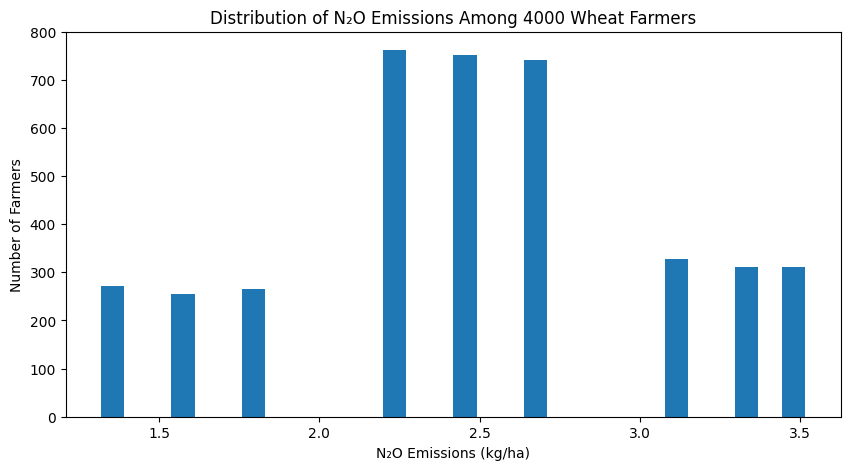

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["N2O_gas_kg_per_ha"], bins=30)
plt.xlabel("N₂O Emissions (kg/ha)")
plt.ylabel("Number of Farmers")
plt.title("Distribution of N₂O Emissions Among 4000 Wheat Farmers")
plt.show()

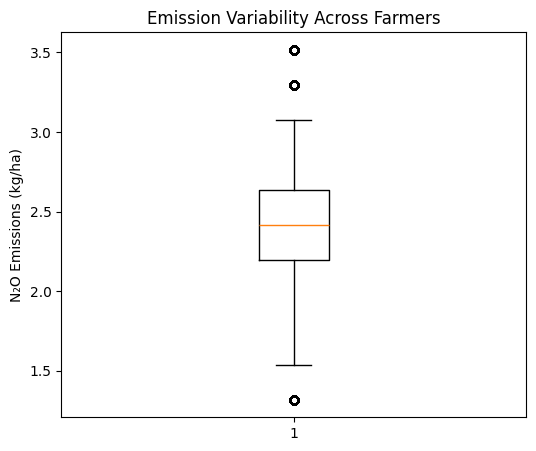

In [17]:
plt.figure(figsize=(6,5))
plt.boxplot(df["N2O_gas_kg_per_ha"])
plt.ylabel("N₂O Emissions (kg/ha)")
plt.title("Emission Variability Across Farmers")
plt.show()

